In [1]:
# Import libraries

import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction Time-series analysis
The data is taken from an experiment that measures the growth of bacteria (E. coli) in a 96 wells microplate. The growth is measured in OD (optical density) over time in seconds.
The data file, "bacterial_growth.csv", is in CSV format (comma separated values). The first row in the file is the time of measurements. The next 96 rows are the OD values in each well at each time point.

### 1. time_series_analysis(path_dataset)

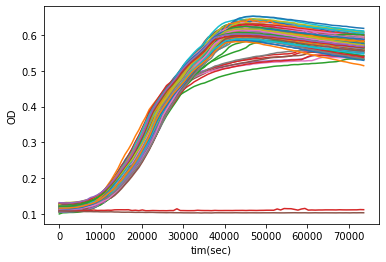

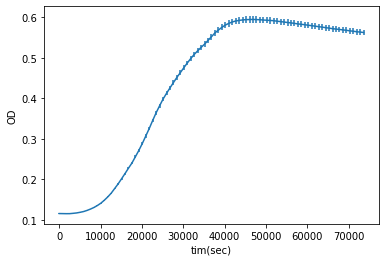

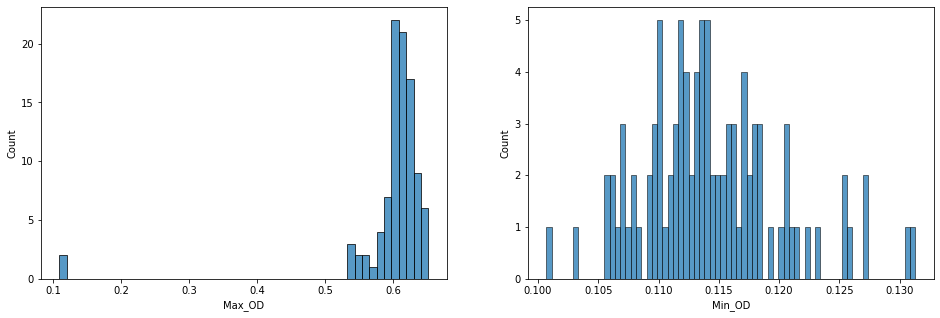

In [2]:
def time_series_analysis(path_dataset):
    
    # loading the data using the loadtxt function in numpy
    data = np.loadtxt(path_dataset,delimiter=',')
    
    # first row of the data in a variable called t (for time) and the rest of the rows in a variable called OD.
    t = data[0,:]
    OD = data[1:,0:]
    
    # each line will show the ODs of all wells at a certain time, by applying OD.T.
    OD_T = OD.T
    
    # Plot all the growth curves - one per well, or per row in the data (96 curves in total).
    plt.xlabel('tim(sec)', fontsize = 10)
    plt.ylabel('OD', fontsize = 10)
    plt.plot(t, OD_T)
    plt.show()
    
    # present an aggregated version of the previous plot.
    # plot the mean and SEM (standard error of the mean) of the OD values across the wells at each time point.
    mean_OD = np.mean(OD_T, axis=1)
    SEM = np.std(OD_T,axis = 1)/np.sqrt(len(OD_T[0,:]))
    plt.xlabel('tim(sec)', fontsize = 10)
    plt.ylabel('OD', fontsize = 10)
    plt.errorbar(t, mean_OD,yerr=SEM)
    plt.show()

    # check the distributions of the maximum and minimum OD values in each well (row of data).
    # calculate the maximum and minimum OD over time in each well and plot two histograms, one for the maximum OD and one for the minimum OD.
    max_well = np.max(OD,axis = 1)
    min_well = np.min(OD,axis = 1)
    fig, axes = plt.subplots(1, 2, figsize = (16,5))
    
    axes[0].set_xlabel('Max_OD', fontsize = 10)
    axes[1].set_xlabel('Min_OD', fontsize = 10)

    sns.histplot(data=max_well,ax=axes[0],bins=50)
    sns.histplot(data=min_well,ax=axes[1],bins =70)
    plt.show()

time_series_analysis(r"/kaggle/input/bacterial-data-analysis/bacterial_growth.csv")

## Introduction Split-apply-combine
This data set contains the fitness of a flocculated strain of Escherichia coli relative to a non-flocculated strain when grown alone in either spatially-structured (dish) or spatially-unstructured (tube) environments. 

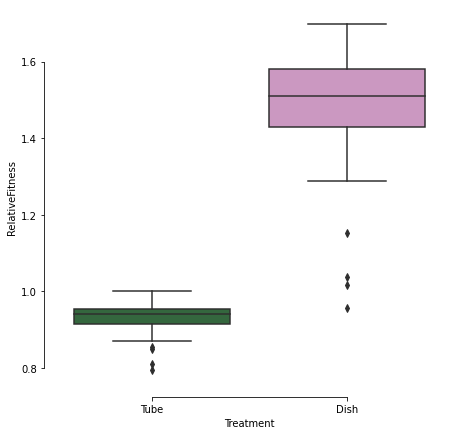

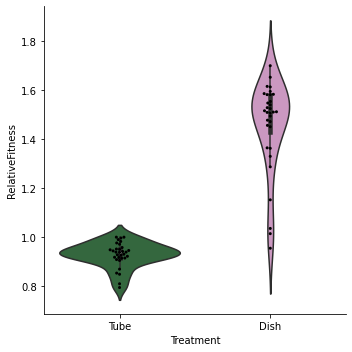

1.3744801964169032e-11
                RelativeFitness          
                           mean       std
Group Treatment                          
BAC   Dish             1.633628  0.026313
      Tube             0.802749  0.010808
BKB   Dish             1.315682  0.179156
      Tube             0.951087  0.070794
DOS   Dish             1.587148  0.006740
      Tube             0.945595  0.005768
ECO   Dish             1.561197  0.124910
      Tube             0.971033  0.029120
ETH   Dish             1.482941  0.124571
      Tube             0.934431  0.022169
FIT   Dish             1.001960  0.041853
      Tube             0.956410  0.038808
H2W   Dish             1.525228  0.014052
      Tube             0.902636  0.043792
HHE   Dish             1.424773  0.085070
      Tube             0.939615  0.015305
JDK   Dish             1.546707  0.036218
      Tube             0.890721  0.036479
PPP   Dish             1.547974  0.036531
      Tube             0.970277  0.020897
SWI   Dish 

In [3]:
def split_apply_combine(path_dataset):
    
    # load "TradeoffData.csv" into a pandas data frame
    data = pd.read_csv(path_dataset,sep=',')
    data.head()

    #group the data by the Treatment variable
    group_Treatment = data.groupby('Treatment')
    group_Treatment.describe()

    # plot a summary of the distribution of RelativeFitness in each of the Treatments
    
    #boxplot
    f = plt.figure(figsize=[7,7])
    ax = sns.boxplot(x="Treatment", y="RelativeFitness",data=data,palette='cubehelix')
    sns.despine(offset=10, trim=True)
    plt.show()
    
    # catplot
    g = sns.catplot(x="Treatment", y="RelativeFitness",data=data, kind="violin", split=True,palette='cubehelix')
    sns.swarmplot(x="Treatment", y="RelativeFitness",data=data, color="k", size=3, ax=g.ax)
    plt.show()
    
    #Calculation of statistical significance
    statistic,P_value = scipy.stats.mannwhitneyu(data[data["Treatment"]=='Tube']['RelativeFitness'],data[data["Treatment"]=='Dish']['RelativeFitness'])
    print(P_value)
    
    # check if the variance between Groups in the same Treatment is large and if the Treatment had the same effect on all Groups
    data_slice = data[['Group','Treatment','RelativeFitness']]
    grouped= data_slice.groupby(['Group','Treatment'])
    grouped.describe()
    
    # grouped object for calculate the mean and the std (standard deviation)
    agg_object = grouped.agg([np.mean, np.std])
    print(agg_object)

split_apply_combine(r'/kaggle/input/bacterial-data-analysis/TradeoffData.csv')